In [125]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

%matplotlib inline

Reading the data

In [154]:
url =  "C:/Users/yasht/Documents/GitHub/pandas-cookbook/data/311-service-requests.csv"

data = pd.read_csv(url,  low_memory= False)

Inspecting the data

In [155]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      111069 non-null  int64  
 1   Created Date                    111069 non-null  object 
 2   Closed Date                     60270 non-null   object 
 3   Agency                          111069 non-null  object 
 4   Agency Name                     111069 non-null  object 
 5   Complaint Type                  111069 non-null  object 
 6   Descriptor                      110613 non-null  object 
 7   Location Type                   79022 non-null   object 
 8   Incident Zip                    98807 non-null   object 
 9   Incident Address                84441 non-null   object 
 10  Street Name                     84432 non-null   object 
 11  Cross Street 1                  84728 non-null   object 
 12  Cross Street 2  

In [156]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'], dtype='object')

In [188]:
use_data = data[['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type','City', 'Borough', 'Status']]

Cleaning the Data

In [189]:
use_data['Closed Date'] = use_data['Closed Date'].fillna(datetime.date(2013,12,31))

C:\Users\yasht\AppData\Local\Temp/ipykernel_7440/2075316990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['Closed Date'] = use_data['Closed Date'].fillna(datetime.date(2013,12,31))


In [190]:
use_data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,City,Borough,Status
0,26589651,10/31/2013 02:08:41 AM,2013-12-31,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,JAMAICA,QUEENS,Assigned
1,26593698,10/31/2013 02:01:04 AM,2013-12-31,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,MASPETH,QUEENS,Open
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NEW YORK,MANHATTAN,Closed
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,NEW YORK,MANHATTAN,Closed
4,26590930,10/31/2013 01:53:44 AM,2013-12-31,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,NEW YORK,MANHATTAN,Pending
...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,BROOKLYN,BROOKLYN,Closed
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,JAMAICA,QUEENS,Closed
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,NEW YORK,MANHATTAN,Closed
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,BROOKLYN,BROOKLYN,Closed


In [191]:
use_data['Created Date'] = pd.to_datetime(use_data['Created Date'])

C:\Users\yasht\AppData\Local\Temp/ipykernel_7440/2643074641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['Created Date'] = pd.to_datetime(use_data['Created Date'])


In [192]:
use_data['Closed Date'] = pd.to_datetime(use_data['Closed Date'])

C:\Users\yasht\AppData\Local\Temp/ipykernel_7440/3004101171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['Closed Date'] = pd.to_datetime(use_data['Closed Date'])


In [193]:
use_data['Duration'] = use_data['Closed Date'] - use_data['Created Date']

C:\Users\yasht\AppData\Local\Temp/ipykernel_7440/2046904074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['Duration'] = use_data['Closed Date'] - use_data['Created Date']


In [194]:
use_data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,City,Borough,Status,Duration
0,26589651,2013-10-31 02:08:41,2013-12-31 00:00:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,JAMAICA,QUEENS,Assigned,60 days 21:51:19
1,26593698,2013-10-31 02:01:04,2013-12-31 00:00:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,MASPETH,QUEENS,Open,60 days 21:58:56
2,26594139,2013-10-31 02:00:24,2013-10-31 02:40:32,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NEW YORK,MANHATTAN,Closed,0 days 00:40:08
3,26595721,2013-10-31 01:56:23,2013-10-31 02:21:48,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,NEW YORK,MANHATTAN,Closed,0 days 00:25:25
4,26590930,2013-10-31 01:53:44,2013-12-31 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,NEW YORK,MANHATTAN,Pending,60 days 22:06:16
...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,2013-10-04 00:01:13,2013-10-07 16:07:16,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,BROOKLYN,BROOKLYN,Closed,3 days 16:06:03
111065,26428083,2013-10-04 00:01:05,2013-10-04 02:13:50,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,JAMAICA,QUEENS,Closed,0 days 02:12:45
111066,26428987,2013-10-04 00:00:45,2013-10-04 01:25:01,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,NEW YORK,MANHATTAN,Closed,0 days 01:24:16
111067,26426115,2013-10-04 00:00:28,2013-10-04 04:17:32,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,BROOKLYN,BROOKLYN,Closed,0 days 04:17:04


Which city has most crime?

In [195]:
city = use_data.groupby(by = 'City').count()
city.sort_values(by = 'Unique Key', ascending= False).head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Borough,Status,Duration
City,,,,,,,,,,,
BROOKLYN,31662,31662,31662,31662,31662,31662,31562,25755,31662,31662,31662
NEW YORK,22664,22664,22664,22664,22664,22664,22427,17310,22664,22664,22664
BRONX,18438,18438,18438,18438,18438,18438,18403,16095,18438,18438,18438
STATEN ISLAND,4766,4766,4766,4766,4766,4766,4757,3073,4766,4766,4766
Jamaica,1521,1521,1521,1521,1521,1521,1521,1017,1521,1521,1521
Flushing,1066,1066,1066,1066,1066,1066,1066,707,1066,1066,1066
Astoria,892,892,892,892,892,892,892,595,892,892,892
FLUSHING,737,737,737,737,737,737,732,705,737,737,737
JAMAICA,725,725,725,725,725,725,721,682,725,725,725


How many percent of the crime comes from the top 5 cities?

<AxesSubplot:xlabel='City'>

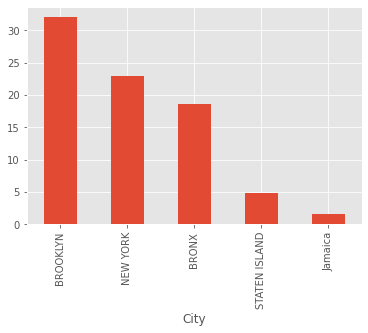

In [196]:
city_percent = (city.Status / city.Status.sum() * 100)
city_percent.sort_values(ascending= False).head(5).plot(kind = 'bar')

What is the most complaint recieved?

In [197]:
crime = use_data.groupby(by = ['Complaint Type']).count()
crime.sort_values(by = 'Unique Key', ascending= False).head(20)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,City,Borough,Status,Duration
Complaint Type,,,,,,,,,,,
HEATING,14200,14200,14200,14200,14200,14200,14200,14198,14200,14200,14200
GENERAL CONSTRUCTION,7471,7471,7471,7471,7471,7471,7471,7466,7471,7471,7471
Street Light Condition,7117,7117,7117,7117,7117,7117,0,3861,7117,7117,7117
DOF Literature Request,5797,5797,5797,5797,5797,5797,0,0,5797,5797,5797
PLUMBING,5373,5373,5373,5373,5373,5373,5373,5371,5373,5373,5373
PAINT - PLASTER,5149,5149,5149,5149,5149,5149,5149,5147,5149,5149,5149
Blocked Driveway,4590,4590,4590,4590,4590,4590,4590,4590,4590,4590,4590
NONCONST,3998,3998,3998,3998,3998,3998,3998,3990,3998,3998,3998
Street Condition,3473,3473,3473,3473,3473,3473,1660,3288,3473,3473,3473


Which agency has most cases in a particular city?

In [198]:
police = use_data.groupby(by = ['Agency', 'City']).count()
police.sort_values(by = 'Unique Key', ascending= False).head(20)

Unique Key  Created Date  Closed Date  Agency Name  Complaint Type  Descriptor  Location Type  Borough  Status  Duration
Agency City                                                                                                                                   
HPD    BROOKLYN            13868         13868        13868        13868           13868       13868          13868    13868   13868     13868
       BRONX               11492         11492        11492        11492           11492       11492          11492    11492   11492     11492
       NEW YORK             7866          7866         7866         7866            7866        7866           7866     7866    7866      7866
NYPD   BROOKLYN             4885          4885         4885         4885            4885        4809           4885     4885    4885      4885
DOT    BROOKLYN             4161          4161         4161         4161            4161        4161           1622     4161    4161      4161
NYPD   NEW YORK             3643          3643         3643         3643            3643        3432           3643     3643    3643      3643
DEP    NEW YORK             3408          3408         3408         3408            3408        3408              0     3408    3408      3408
DSNY   BROOKLYN             2923          2923         2923         2923            2923        2923           2865     2923    2923      2923
DOT    NEW YORK             2629          2629         2629         2629            2629        2629           1903     2629    2629      2629
DEP    BROOKLYN             2065          2065         2065         2065            2065        2065              0     2065    2065      2065
NYPD   BRONX                1932          1932         1932         1932            1932        1910           1932     1932    1932      1932
DOT    BRONX                1397          1397         1397         1397            1397        1397            418     1397    1397      1397
DPR    BROOKLYN             1290          1290         1290         1290            1290        1290           1258     1290    1290      1290
DSNY   NEW YORK             1145          1145         1145         1145            1145        1145           1136     1145    1145      1145
DOT    STATEN ISLAND        1103          1103         1103         1103            1103        1103            286     1103    1103      1103
DSNY   BRONX                1076          1076         1076         1076            1076        1076           1012     1076    1076      1076
TLC    NEW YORK              931           931          931          931             931         931            596      931     931       931
DOHMH  NEW YORK              910           910          910          910             910         898            910      910     910       910
       BROOKLYN              888           888          888          888             888         877            888      888     888       888
HPD    STATEN ISLAND         851           851          851          851             851         851            851      851     851       851

Which agency has the most open cases in data?

In [203]:
status = use_data.groupby(by = ['Status', 'Agency']).count()
status_sort =  status.sort_values(by = 'Status' ,ascending= False).head(20)
status_sort.loc[['Open']].sort_values(by = 'Unique Key', ascending = False)

Unique Key  Created Date  Closed Date  Agency Name  Complaint Type  Descriptor  Location Type   City  Borough  Duration
Status Agency                                                                                                                         
Open   HPD          29289         29289        29289        29289           29289       29289          29289  29267    29289     29289
       DEP           4781          4781         4781         4781            4781        4780              0   4758     4781      4781
       DOB           1703          1703         1703         1703            1703        1703             30   1681     1703      1703
       DOT           1630          1630         1630         1630            1630        1630            420   1200     1630      1630
       DOHMH          570           570          570          570             570         530            570    568      570       570
       DCA            393           393          393          393             393         393              0    360      393       393
       DOF            276           276          276          276             276         276             36     36      276       276
       3-1-1           60            60           60           60              60          60              0      0       60        60
       FDNY            60            60           60           60              60          60             60     60       60        60
       NYPD            19            19           19           19              19          13             19     18       19        19
       DOITT           11            11           11           11              11          11              9     11       11        11
       OEM             10            10           10           10              10          10              0      0       10        10
       DOE              3             3            3            3               3           3              3      3        3         3
       DFTA             2             2            2            2               2           0              2      0        2         2
       DHS              2             2            2            2               2           2              0      0        2         2

What is the most common complain?

In [201]:
## Most common complain?
use_data['Descriptor'].value_counts().head(10)

HEAT                                                       14126
Street Light Out                                            5396
Property Tax Exemption Application for Owners - English     4683
No Access                                                   3429
Loud Music/Party                                            3166
VERMIN                                                      3086
WALLS                                                       2605
CEILING                                                     2316
WATER-LEAKS                                                 1955
Controller                                                  1833
Name: Descriptor, dtype: int64

How many cases does an agency handle?

In [202]:
## How many case does agency handle?
agency = use_data.groupby(by = ['Agency']).count()
agency.sort_values(by = 'Unique Key', ascending= False)

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,City,Borough,Status,Duration
Agency,,,,,,,,,,,
HPD,39067,39067,39067,39067,39067,39067,39067,39045,39067,39067,39067
DOT,17707,17707,17707,17707,17707,17707,5480,12579,17707,17707,17707
NYPD,15295,15295,15295,15295,15295,14938,15295,15293,15295,15295,15295
DEP,8897,8897,8897,8897,8897,8896,0,8833,8897,8897,8897
DSNY,8385,8385,8385,8385,8385,8385,8200,8187,8385,8385,8385
DOF,6370,6370,6370,6370,6370,6370,573,565,6370,6370,6370
DPR,4614,4614,4614,4614,4614,4614,4534,4590,4614,4614,4614
DOHMH,3237,3237,3237,3237,3237,3191,3237,3229,3237,3237,3237
DOB,3014,3014,3014,3014,3014,3014,420,2947,3014,3014,3014
